In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [2]:
file_df = pd.read_csv("Resources/loanData.csv")
file_df

clean_df = file_df.dropna()
clean_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
clean_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
encoded_df = pd.get_dummies(clean_df[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term","Credit_History", "Property_Area", "Loan_Status"]], drop_first=True)
encoded_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


## Legend:

##### Gender
0 Female
1 Male

##### Married
0 No
1 Yes

#### Dependents (0, 1, 2, 3+)  All 0 => Dependents = 0
##### Dependents_1
0 No
1 Yes

##### Dependents_2
0 No
1 Yes

##### Dependents_3+
0 No
1 Yes

##### Education
0 Graduate
1 Not Graduate

##### Self-Employed
0 No
1 Yes

#### Property_Area (Rural, Semiurban, Urban)  All 0 => Property_Area = Rural
##### Property_Area_Semiurban
0 No
1 Yes

##### Property_Area_Urban
0 No
1 Yes

##### Loan_Status
0 No
1 Yes

In [7]:
#y
target = encoded_df['Loan_Status_Y']
target_names = ['denied', 'approved']

# X = encoded_df.drop(columns=['Loan_Status_Y'])
# y = encoded_df['Loan_Status_Y']

In [8]:
#X
data = encoded_df.drop('Loan_Status_Y', axis = 1)
feature_names = data.columns
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [10]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
# 75/25 split

#### Decision Tree

In [11]:
#Decision Tree 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6916666666666667

In [13]:
#Sort features by their importance 
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.24459205622661825, 'Credit_History'),
 (0.1992793197871598, 'ApplicantIncome'),
 (0.19104641352957666, 'LoanAmount'),
 (0.11529535808615252, 'CoapplicantIncome'),
 (0.05418339736121506, 'Loan_Amount_Term'),
 (0.02913164154569578, 'Property_Area_Semiurban'),
 (0.02548302371478467, 'Married_Yes'),
 (0.023144612577511978, 'Self_Employed_Yes'),
 (0.022131625856704275, 'Gender_Male'),
 (0.021234418828219463, 'Dependents_1'),
 (0.021168695992972386, 'Education_Not Graduate'),
 (0.02013472368702748, 'Property_Area_Urban'),
 (0.01881845274363125, 'Dependents_2'),
 (0.014356260062730407, 'Dependents_3+')]

In [14]:
#Decision Tree predictions
predictions = clf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 0 1 0 1 0 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [15]:
#Decision Tree predictions
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
#116 got wrong

,Prediction,Actual
0,1,1
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
115,1,1
116,1,0
117,0,0
118,1,1


#### Random Forest

In [12]:
#Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8

In [16]:
#Random Forrest predictions
predictions_rf = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions_rf[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 0 1 0 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [17]:
#Random Forrest predictions
pd.DataFrame({"Prediction": predictions_rf, "Actual": y_test}).reset_index(drop=True)
#116 got wrong

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
115,1,1
116,1,0
117,0,0
118,1,1


#### Logistic Regression

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8111111111111111
Testing Data Score: 0.7833333333333333


In [21]:
#Logistic Regression - making predictions
predictions_lr = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions_lr[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 0 1 0 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


In [22]:
#Logistic Regression - making predictions
pd.DataFrame({"Prediction": predictions_lr, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
115,1,1
116,1,0
117,0,0
118,1,1


#### K-Nearest Neighbor

In [23]:
#K-NN benefits from normalization - use Standard Scaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [26]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.658
k: 3, Train/Test Score: 0.833/0.758
k: 5, Train/Test Score: 0.808/0.742
k: 7, Train/Test Score: 0.800/0.767
k: 9, Train/Test Score: 0.781/0.750
k: 11, Train/Test Score: 0.783/0.717
k: 13, Train/Test Score: 0.789/0.733
k: 15, Train/Test Score: 0.786/0.750
k: 17, Train/Test Score: 0.786/0.758
k: 19, Train/Test Score: 0.778/0.767


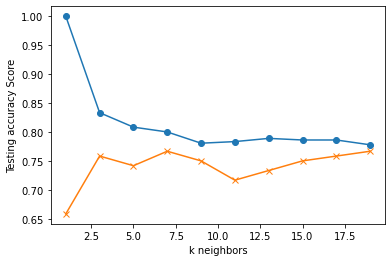

In [27]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show();

In [28]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.767


#### Support Vector Machine (SVM)

In [29]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.725


In [31]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions_svm = model.predict(X_test)
print(classification_report(y_test, predictions_svm,
                            target_names=target_names))

              precision    recall  f1-score   support

      denied       1.00      0.13      0.23        38
    approved       0.71      1.00      0.83        82

    accuracy                           0.73       120
   macro avg       0.86      0.57      0.53       120
weighted avg       0.80      0.72      0.64       120



In [19]:
#Save the trained model
#pickle or joblib https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/ 

#AttributeError: 'RandomForestClassifier' object has no attribute 'save'